In [1]:
# place folder `PNlib` near to *.ipynb
from PNlib import PolyNumConf
PolyNumConf.max_N=32 # PN significant digits number (restart jupyter kernel on change)

In [2]:
from PNlib.PolyNum import PolyNum
%matplotlib inline

# Discrete representations of generalized time domain functions

## Laplace transform

The functions of continuous time defined for $t \geq 0$, can be expressed in **Mikusinski's operational calculus** in form of functions of **Heaviside's operator** $ p = \cfrac{1}{\int_0^t} $ where $X(p)$ denote $\color{magenta}{\text{Laplace transform}}$ formulas: 

$$
\{ x (t) \} = \color{magenta}{X(p)} \color{brown}{ \cdot p \cdot \{1\} }
$$

$ \{1\} $ denotes function, with value $ 1 $ for all $ t \geq 0 $.

For example $ \{ 200\ sin(t) \} = \color{magenta}{200\ \cfrac{2}{p^2 + 4}} \color{brown}{  \cdot  p \cdot \{1\} }$.

##  Z-transform

Z-transform corresponds to $ \{ x (t) \} $ is determined by series of samples in discrete time $ t_k = k\ h $, where $ k = 0, 1,\dots$ and $ h $ is the sampling period:

$$
\underline{x} = (^\sim x_0\!^\sim, x_1\!^\sim x_2\!^\sim \dots ^\sim) = \left.(x_0 \,z^0 + x_1 \,z^{-1} + x_2 \,z^{-2} + \dots)\right|_{z\,=\,(^\sim 1 ^\sim 0 ^\sim)}\\
$$

Replacing continuous time function $\{1\}$ by sequence of samples $
(^\sim 0.5^\sim, 1^\sim 1^\sim1^\sim \dots^\sim)
$
and replacing Heaviside operator $ p $ utilizing algorithm of numerical integration
$$
\underline{p} = \frac{2}{h} \left.\frac{1 - z^{-1}}{1 + z^{-1}}\right|_{z = (^\sim 1 ^\sim 0 ^\sim)} 
= \frac{2}{h} \frac{(^\sim 1 ^\sim , -1 ^\sim)}{(^\sim 1 ^\sim , 1 ^\sim)}
= \frac{1}{h}\ (^\sim 2^\sim, -4^\sim 4^\sim -4^\sim \dots^\sim) \\
$$
we obtain expression for approximate sequence of samples of function $\{ x(t) \}$:


$$
\\
\underline{x} = \color{magenta}{X (\underline{p})} \color{brown}{  \cdot \underline{p} \cdot (^\sim0.5^\sim, 1^\sim1^\sim1^\sim \dots ^\sim) }
$$

This way we get discrete samples of abstract functions, like derivative of non-smooth function, like  
$
\{x_a(t)\} = \{ \cfrac{\mathrm{d}}{\mathrm{d}t} \delta(t) \} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{p} 
$, 
where Laplace transform  $ \color{magenta}{X(p) = p} $ or function containing negative delay, like  
$
\{x_b(t)\} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{ \cfrac{1}{p^2 + p + 4}\ \exp(-(-0.1)\sqrt{p^2 +1}) } 
$ 
(see
[Mikusinski's remarks about negative delay operator](http://www.pei.prz.edu.pl/~kubaszek/smacd06/JM_OperCalc.html)).

In [3]:
# plt.plot() #(Codefolding extension)
import matplotlib.pyplot as plt
plt.rc('lines', linewidth=1)
plt.rcParams["figure.figsize"] = [11,4]
#plt.rcParams["figure.dpi"] = 200 
#plt.rc('text', usetex=True)

In [4]:
# Z-transform (live example):
f_1111 = 0.5 * PolyNum('const:(~1~,2~2~2~2~...~)')
p_tr = PolyNum('const:(~2~,-4~4~-4~4~...~)') # 2*(~1~-1~)/(~1~1~)

### Digital samples of derivative of the step function:

$
\{x_a(t)\}  = \{ \cfrac{\mathrm{d}}{\mathrm{d}t} \delta(t) \} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{p} 
$

In [5]:
x_a, t_a = [], []
for h in [0.4,0.8]:  # diffrent sampling periods
    t_a += [ [k*h for k in range(len(p_tr))] ]
    p = 1/h * p_tr
    x_a += [ p * f_1111 * p ]

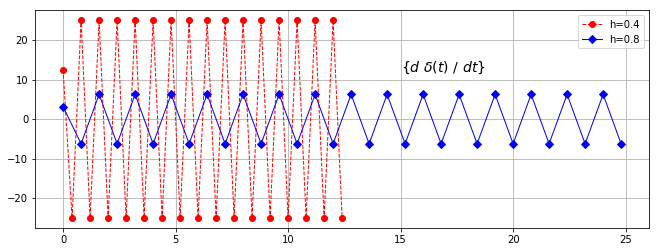

In [6]:
# plt.plot(x_a)
plotStyle = ['r--o','b-D']
for i in range(len(x_a)):
    plt.plot(t_a[i],x_a[i],plotStyle[i], label='h='+str(t_a[i][1]))
plt.grid(b=True)
plt.legend()
plt.text(15,12,"{$ d\ \delta(t)\ /\ dt $}", fontsize=14)
plt.show();

- - - -

### Digital samples of signal containing negative delay operator:

$
\{x_b(t)\} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{ \cfrac{1}{p^2 + p + 4}\ \exp(-(-T_0)\sqrt{p^2 +1}) } 
$

$ \color{magenta}{ T_0 = 0.04 } $

In [7]:
x_b, t_b = [], []
T_0 = 0.04
for h in [0.15,0.2]:  # diffrent sampling periods
    t_b += [ [k*h for k in range(len(p_tr))] ]
    p = 1/h * p_tr
    x_b += [ p * f_1111 * 1 / (p**2 + p + 4) * ( -(-T_0) * ( (p**2 +1).sqrt() ) ).exp() ]

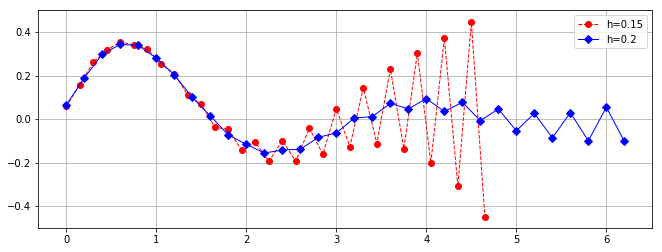

In [8]:
# plt.plot(x_b) 
plt.ylim((-0.5, 0.5))
for i in range(len(x_b)):
    plt.plot(t_b[i],x_b[i],plotStyle[i], label='h='+str(t_b[i][1]))
plt.grid(b=True)
plt.legend()
plt.show();

Neutralizing negative delay operator we get regular function for $t \geq 0$
 (see the last part of [Mikusinski's remarks about negative delay operator](http://www.pei.prz.edu.pl/~kubaszek/smacd06/JM_OperCalc.html)):

$ \{x_b(t)\} = \color{brown}{ p \cdot \{1\} \cdot \ } \color{magenta}{ \cfrac{1}{p^2 + p + 4}\ \exp(-(-T_0)\sqrt{p^2 +1}) \cdot \exp(-T_0\, p)} $

$ \color{magenta}{ T_0 = 0.04 } $

In [9]:
x_b0, t_b = [], []
for h in [0.15,0.2]:  # diffrent sampling periods
    t_b += [ [k*h for k in range(len(p_tr))] ]
    p = 1/h * p_tr
    x_b0 += [ p * f_1111 * 1 / (p**2 + p + 4) * ( -(-T_0) * ( (p**2 +1).sqrt() ) ).exp() * (-T_0*p).exp() ]

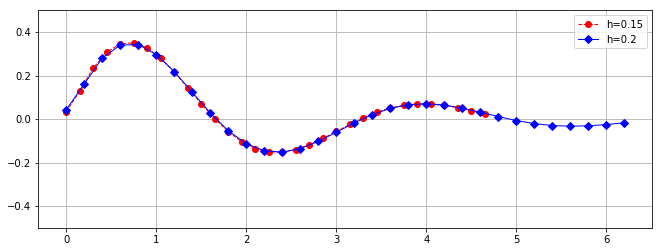

In [10]:
# plt.plot(x_b0) 
plt.ylim((-0.5, 0.5))
for i in range(len(x_b)):
    plt.plot(t_b[i],x_b0[i],plotStyle[i], label='h='+str(t_b[i][1]))
plt.grid(b=True)
plt.legend()
plt.show();

- - - -
[<<<... 03. PN digits type ...](03.PN digits type.ipynb) _ | _ [... 05. PN - Black box ...>>>](05.PN - Black box.ipynb)